In [1]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()

from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
flip_probs = [0.2, 0.2, 0.3, 0.5, 0.6]
mushrooms_data = data.MushroomsDataProvider(resample=True, flip_probs=flip_probs, annotate_prob=0.7)

3916
4208


Iter 00, logit: -2.859714
Iter 10, logit: -2.689896
Iter 20, logit: -2.686487
Iter 30, logit: -2.685126
Iter 40, logit: -2.684080
---------------
Label accuracy is 0.8162794276042468
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.849111
Iter 10, logit: -2.539765
Iter 20, logit: -2.465471
Iter 30, logit: -2.423728
Iter 40, logit: -2.397543
(6499, 57)
Classifier train accuracy is 0.8562855823972919
(1625, 57)
Classifier test accuracy is 0.7913846153846154
Label accuracy is 0.9135251577165718
--------------------------------------------------
Data has 57 features
Iter 00, logit: -2.857047
Average Raykar weight is 0.0
Iter 10, logit: -2.682636
Average Raykar weight is 0.0
Iter 20, logit: -2.679389
Average Raykar weight is 0.0
Iter 30, logit: -2.678065
Average Raykar weight is 0.0
Iter 40, logit: -2.676962
Average Raykar weight is 0.0
Average Raykar weight is 0.0
Classifier train accuracy is 0.8507462686567164
Classifier test accuracy is 0.7575384

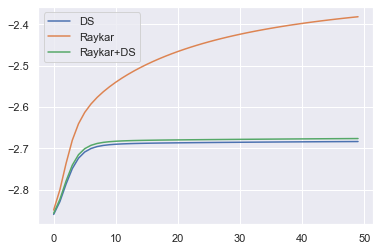

In [7]:
reload_all()

mushrooms_methods, mushroom_points, advantages_matrix = bm.compare_methods(mushrooms_data, max_iter=50)
bm.print_conf(mushrooms_methods)

Number of data points: 6499


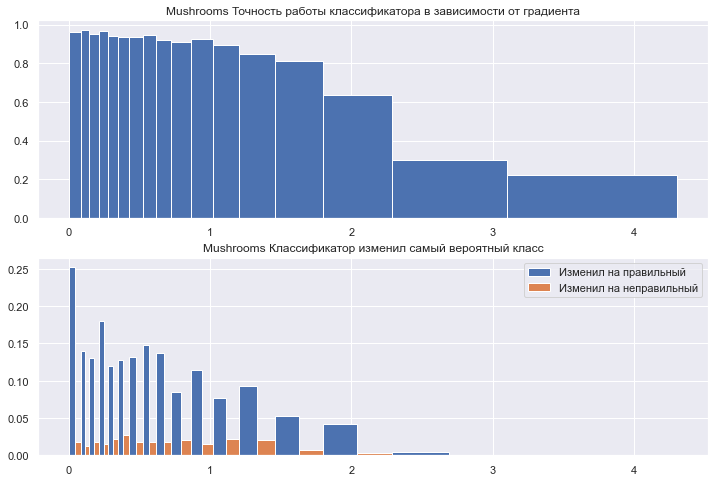

In [4]:
buckets, confidences, wrong, correct = bm.build_grad_hist(mushrooms_data, mushrooms_methods, mushroom_points, 'Mushrooms', 400)
condidence_mushrooms = bm.get_confidence(buckets[0], confidences[0])

735 101


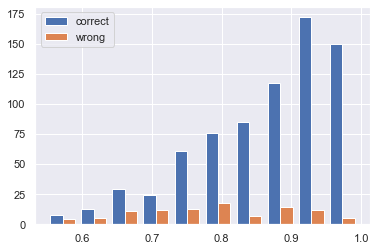

In [6]:
reload_all()
bm.plot_flips(correct, wrong, 'classifier_r')